In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from sklearn.metrics import recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import KFold
import numpy as np


pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", None)

# Data Preparation


## Combine All Data Kata


In [118]:
def merge_csv_files_with_filename(directory):
    df_list = []

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)

            df = pd.read_csv(file_path)

            df["label"] = str(os.path.splitext(filename)[0]).capitalize()

            df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


directory = "datasets/extraction-feature-default/Non-Merged"
combined_df = merge_csv_files_with_filename(directory)

combined_df.to_csv("datasets/extraction-feature-default/fix-data.csv", index=False)

## Labelling Alphabet


In [45]:
alphabet_df = pd.read_csv("./datasets/extraction-feature-default/alphabet.csv")
alphabet_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,-0.119020,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,-0.091366,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,-0.023058,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,-0.047230,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,-0.119402,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839


In [46]:
alphabet_df["label"] = alphabet_df["filename"].apply(lambda x: x[0])
alphabet_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_0.jpg,0.155182,0.729192,2.719984e-07,0.205288,0.735770,-0.017337,0.275075,0.718441,-0.035706,0.329495,0.709703,-0.055288,0.374989,0.702892,-0.076279,0.293241,0.639296,-0.046337,0.369748,0.612025,-0.084543,0.422023,0.597921,-0.107750,...,0.214076,0.620907,-0.074296,0.272353,0.658624,-0.120460,0.250701,0.692648,-0.112077,0.228995,0.689233,-0.097932,0.166513,0.630084,-0.089888,0.217268,0.657916,-0.120492,0.212754,0.687127,-0.110377,0.198819,0.687841,-0.097879,A
1,A_1.jpg,0.838807,0.719874,-2.164804e-07,0.771837,0.725273,-0.009544,0.705295,0.701828,-0.023455,0.662583,0.677778,-0.039253,0.628528,0.655313,-0.056163,0.697544,0.624706,-0.041077,0.612177,0.596289,-0.075613,0.560344,0.577005,-0.094528,...,0.778687,0.613676,-0.073650,0.714158,0.669719,-0.111475,0.741234,0.699804,-0.090671,0.767731,0.690158,-0.068801,0.825814,0.631450,-0.092105,0.772004,0.671297,-0.121461,0.778908,0.694842,-0.108882,0.794608,0.690194,-0.093175,A
2,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
3,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
4,A_102.jpg,0.143311,0.835336,1.923219e-07,0.214950,0.844010,-0.012342,0.296637,0.814950,-0.027893,0.355519,0.792106,-0.046894,0.400802,0.763687,-0.066535,0.302602,0.724712,-0.037958,0.395459,0.693706,-0.078667,0.456062,0.675371,-0.102087,...,0.215821,0.706110,-0.072580,0.282703,0.770142,-0.123735,0.246608,0.804842,-0.112590,0.217682,0.791075,-0.096030,0.170938,0.723427,-0.091741,0.227759,0.771976,-0.123583,0.207771,0.800647,-0.111719,0.182577,0.788167,-0.097839,A


## Combine Kata + Karakter


In [47]:
kata_df = pd.read_csv("./datasets/extraction-feature-default/40-kata.csv")
kata_df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,annotated_000008.jpg,0.268382,0.744393,6.803466e-08,0.280761,0.705737,-0.005387,0.332624,0.671905,-0.016733,0.390121,0.661721,-0.028926,0.434973,0.666202,-0.040863,0.342549,0.663610,-0.029849,0.407459,0.637570,-0.050515,0.452237,0.622324,-0.063267,...,0.379611,0.712160,-0.055015,0.450676,0.693179,-0.076478,0.430502,0.699660,-0.062527,0.402310,0.706136,-0.047598,0.393368,0.738127,-0.067984,0.447547,0.719188,-0.075345,0.427779,0.722588,-0.059219,0.401511,0.728171,-0.045366,Aku
1,annotated_000009.jpg,0.299242,0.721207,-2.027723e-09,0.309196,0.684461,-0.002298,0.356788,0.653571,-0.008736,0.410765,0.644649,-0.016566,0.451170,0.647947,-0.024366,0.371834,0.644341,-0.017050,0.431443,0.620406,-0.031288,0.470434,0.605882,-0.040382,...,0.414941,0.689099,-0.037593,0.474138,0.667484,-0.053275,0.455545,0.672951,-0.041676,0.431139,0.680876,-0.028847,0.429697,0.712821,-0.047924,0.474424,0.692056,-0.052460,0.456571,0.694199,-0.038174,0.434866,0.701169,-0.025463,Aku
2,annotated_000010.jpg,0.331698,0.707971,-5.837437e-08,0.337825,0.671227,0.002794,0.376913,0.641802,-0.000845,0.423526,0.634469,-0.007162,0.457788,0.640432,-0.013307,0.400992,0.628433,-0.006874,0.454656,0.606864,-0.016856,0.488799,0.594298,-0.023103,...,0.446112,0.668429,-0.028206,0.490581,0.654379,-0.038300,0.475732,0.661618,-0.028060,0.453976,0.667852,-0.017923,0.459798,0.690260,-0.038764,0.493672,0.677070,-0.038842,0.478665,0.681462,-0.025088,0.459762,0.686913,-0.013507,Aku
3,annotated_000011.jpg,0.353782,0.693124,-7.779809e-08,0.361236,0.657339,0.004973,0.398713,0.630149,0.002905,0.443103,0.623765,-0.001971,0.475117,0.630268,-0.006516,0.419666,0.617920,-0.003185,0.471352,0.597687,-0.010411,0.503044,0.587105,-0.014563,...,0.463501,0.655849,-0.023302,0.505082,0.642756,-0.029734,0.492441,0.649524,-0.019620,0.472496,0.655271,-0.010513,0.477001,0.676810,-0.033037,0.508419,0.664395,-0.030818,0.495135,0.668290,-0.017490,0.477694,0.673256,-0.006726,Aku
4,annotated_000012.jpg,0.377396,0.683487,-2.050306e-07,0.385351,0.645810,0.012018,0.420234,0.619822,0.014677,0.458285,0.613827,0.013094,0.486520,0.619899,0.011651,0.450731,0.606407,0.011326,0.495708,0.591359,0.012575,0.519797,0.584686,0.012652,...,0.495351,0.639933,-0.009315,0.525802,0.631792,-0.005976,0.514033,0.639046,0.001649,0.496737,0.645033,0.005914,0.508515,0.660503,-0.018599,0.533507,0.651758,-0.010427,0.521284,0.656520,0.001844,0.504741,0.662198,0.010487,Aku


In [119]:
# df_combined = pd.concat([alphabet_df, kata_df], ignore_index=True)
# df_combined.to_csv("./datasets/extraction-feature-default/fix-data.csv", index=False)

df_combined = pd.read_csv("./datasets/extraction-feature-default/fix-data.csv")
df_combined.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
1,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
2,A_104.jpg,0.374266,0.763398,8.476552e-08,0.396198,0.762898,-0.007273,0.421447,0.749057,-0.016589,0.442611,0.748080,-0.026134,0.462552,0.754046,-0.035815,0.414863,0.677829,-0.023171,0.437819,0.654527,-0.038717,0.454552,0.636908,-0.048166,...,0.386072,0.677201,-0.032311,0.413719,0.709633,-0.047988,0.411252,0.742759,-0.041927,0.402948,0.750655,-0.035182,0.372513,0.696117,-0.037904,0.396558,0.714183,-0.047647,0.399744,0.735968,-0.042633,0.394555,0.741840,-0.037408,A
3,A_105.jpg,0.377740,0.770244,1.166934e-07,0.398956,0.769861,-0.006886,0.423009,0.757068,-0.016069,0.443742,0.758912,-0.025368,0.463288,0.767283,-0.035036,0.415603,0.683739,-0.022446,0.438557,0.668072,-0.037285,0.455652,0.656639,-0.046746,...,0.387766,0.685396,-0.031876,0.415834,0.715592,-0.046479,0.415299,0.749606,-0.041531,0.408142,0.758998,-0.035829,0.375143,0.705435,-0.037485,0.399454,0.720406,-0.046358,0.403891,0.742175,-0.041657,0.399297,0.749929,-0.036902,A
4,A_113.jpg,0.130437,0.829998,2.038851e-07,0.202648,0.837280,-0.013099,0.283311,0.811230,-0.032001,0.348338,0.796146,-0.053869,0.404939,0.785510,-0.076488,0.286568,0.722201,-0.046257,0.382054,0.695294,-0.090049,0.446696,0.677194,-0.115033,...,0.199804,0.707491,-0.080604,0.266576,0.775159,-0.134240,0.231375,0.805632,-0.122317,0.201722,0.788733,-0.104650,0.153950,0.725945,-0.099408,0.208972,0.775039,-0.132425,0.192458,0.800638,-0.120777,0.168742,0.786136,-0.106934,A


In [120]:
df_combined["label"].value_counts()

label
Dia             562
Maaf            513
Halo            513
Kemana          471
Sabar           469
Dimana          459
Baik            446
Kerja           442
Apa             415
Tolong          413
Bapak           384
Aku             384
Besok           380
Bagaimana       377
Kemarin         376
Pagi            376
Kantor          370
Tidur           363
Jawab           362
Malam           354
Siapa           352
Kalian          352
Nanti           347
Siang           346
T               334
L               328
F               326
Hari ini        326
Berapa          325
K               319
Lusa            318
J               318
Lelah           314
Kamu            312
W               312
E               310
Sore            309
Sekarang        307
Kapan           306
N               298
V               298
R               296
Q               294
C               293
M               291
Z               288
I               287
Ibu             280
G               276
U             

# Pre Modelling


In [121]:
df = pd.read_csv("./datasets/extraction-feature-default/fix-data.csv")
df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20,label
0,A_10.jpg,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,...,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784,A
1,A_100.jpg,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,...,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883,A
2,A_104.jpg,0.374266,0.763398,8.476552e-08,0.396198,0.762898,-0.007273,0.421447,0.749057,-0.016589,0.442611,0.748080,-0.026134,0.462552,0.754046,-0.035815,0.414863,0.677829,-0.023171,0.437819,0.654527,-0.038717,0.454552,0.636908,-0.048166,...,0.386072,0.677201,-0.032311,0.413719,0.709633,-0.047988,0.411252,0.742759,-0.041927,0.402948,0.750655,-0.035182,0.372513,0.696117,-0.037904,0.396558,0.714183,-0.047647,0.399744,0.735968,-0.042633,0.394555,0.741840,-0.037408,A
3,A_105.jpg,0.377740,0.770244,1.166934e-07,0.398956,0.769861,-0.006886,0.423009,0.757068,-0.016069,0.443742,0.758912,-0.025368,0.463288,0.767283,-0.035036,0.415603,0.683739,-0.022446,0.438557,0.668072,-0.037285,0.455652,0.656639,-0.046746,...,0.387766,0.685396,-0.031876,0.415834,0.715592,-0.046479,0.415299,0.749606,-0.041531,0.408142,0.758998,-0.035829,0.375143,0.705435,-0.037485,0.399454,0.720406,-0.046358,0.403891,0.742175,-0.041657,0.399297,0.749929,-0.036902,A
4,A_113.jpg,0.130437,0.829998,2.038851e-07,0.202648,0.837280,-0.013099,0.283311,0.811230,-0.032001,0.348338,0.796146,-0.053869,0.404939,0.785510,-0.076488,0.286568,0.722201,-0.046257,0.382054,0.695294,-0.090049,0.446696,0.677194,-0.115033,...,0.199804,0.707491,-0.080604,0.266576,0.775159,-0.134240,0.231375,0.805632,-0.122317,0.201722,0.788733,-0.104650,0.153950,0.725945,-0.099408,0.208972,0.775039,-0.132425,0.192458,0.800638,-0.120777,0.168742,0.786136,-0.106934,A


In [122]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
filename,21187,17297,annotated_000033.jpg,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x_0,21187.0,NaN,NaN,NaN,0.451507,0.16633,0.020867,0.326002,0.439895,0.563816,0.961504
y_0,21187.0,NaN,NaN,NaN,0.642758,0.145067,0.025985,0.552646,0.650953,0.747241,1.020826
z_0,21187.0,NaN,NaN,NaN,0.0,0.0,-0.000001,-0.0,0.0,0.0,0.000002
x_1,21187.0,NaN,NaN,NaN,0.456195,0.150254,-0.00495,0.349852,0.450717,0.546581,0.930616
y_1,21187.0,NaN,NaN,NaN,0.615919,0.145619,0.075829,0.521284,0.625994,0.724554,0.986904
z_1,21187.0,NaN,NaN,NaN,-0.008065,0.013669,-0.11606,-0.011213,-0.005154,-0.00055,0.119151
x_2,21187.0,NaN,NaN,NaN,0.461086,0.137629,-0.017549,0.372686,0.460887,0.53828,0.963333
y_2,21187.0,NaN,NaN,NaN,0.585133,0.146015,0.070293,0.488554,0.597787,0.696895,0.978586
z_2,21187.0,NaN,NaN,NaN,-0.016344,0.021199,-0.163469,-0.022653,-0.010869,-0.004386,0.14765


In [123]:
df.shape

(21187, 65)

In [124]:
X = df.drop(columns=["filename", "label"])
y = df["label"]

display(X.head(), y.head())

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,x_17,y_17,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,0.581184,0.745845,-1.059189e-07,0.557238,0.751812,-0.004449,0.536100,0.740906,-0.010580,0.519795,0.737985,-0.017672,0.502753,0.742129,-0.025208,0.539090,0.672356,-0.008672,0.520708,0.655394,-0.017746,0.509604,0.638421,-0.024760,0.501374,...,-0.023058,0.561821,0.671356,-0.017525,0.537792,0.710742,-0.025926,0.544868,0.730442,-0.019770,0.553987,0.724883,-0.015368,0.572253,0.688464,-0.023423,0.551785,0.715056,-0.030928,0.554675,0.728463,-0.027442,0.562592,0.725510,-0.023784
1,0.374870,0.759894,4.366655e-08,0.398134,0.758703,-0.007355,0.421602,0.743577,-0.017515,0.442338,0.741927,-0.028168,0.462645,0.746148,-0.039076,0.413038,0.671357,-0.023561,0.437463,0.646744,-0.040337,0.453789,0.627753,-0.050616,0.465867,...,-0.047230,0.383540,0.671320,-0.034483,0.411728,0.706482,-0.052234,0.408348,0.740305,-0.046356,0.400300,0.747717,-0.039503,0.370315,0.691556,-0.041090,0.393848,0.708879,-0.052244,0.397180,0.733071,-0.047251,0.392820,0.741922,-0.041883
2,0.374266,0.763398,8.476552e-08,0.396198,0.762898,-0.007273,0.421447,0.749057,-0.016589,0.442611,0.748080,-0.026134,0.462552,0.754046,-0.035815,0.414863,0.677829,-0.023171,0.437819,0.654527,-0.038717,0.454552,0.636908,-0.048166,0.467308,...,-0.043305,0.386072,0.677201,-0.032311,0.413719,0.709633,-0.047988,0.411252,0.742759,-0.041927,0.402948,0.750655,-0.035182,0.372513,0.696117,-0.037904,0.396558,0.714183,-0.047647,0.399744,0.735968,-0.042633,0.394555,0.741840,-0.037408
3,0.377740,0.770244,1.166934e-07,0.398956,0.769861,-0.006886,0.423009,0.757068,-0.016069,0.443742,0.758912,-0.025368,0.463288,0.767283,-0.035036,0.415603,0.683739,-0.022446,0.438557,0.668072,-0.037285,0.455652,0.656639,-0.046746,0.469213,...,-0.043671,0.387766,0.685396,-0.031876,0.415834,0.715592,-0.046479,0.415299,0.749606,-0.041531,0.408142,0.758998,-0.035829,0.375143,0.705435,-0.037485,0.399454,0.720406,-0.046358,0.403891,0.742175,-0.041657,0.399297,0.749929,-0.036902
4,0.130437,0.829998,2.038851e-07,0.202648,0.837280,-0.013099,0.283311,0.811230,-0.032001,0.348338,0.796146,-0.053869,0.404939,0.785510,-0.076488,0.286568,0.722201,-0.046257,0.382054,0.695294,-0.090049,0.446696,0.677194,-0.115033,0.498455,...,-0.127224,0.199804,0.707491,-0.080604,0.266576,0.775159,-0.134240,0.231375,0.805632,-0.122317,0.201722,0.788733,-0.104650,0.153950,0.725945,-0.099408,0.208972,0.775039,-0.132425,0.192458,0.800638,-0.120777,0.168742,0.786136,-0.106934


0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object

## Transform Data


In [125]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# display(X_scaled, y_encoded)

from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
# Save Scaler
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [127]:
class_labels = label_encoder.classes_
class_labels

array(['A', 'Aku', 'Apa', 'B', 'Bagaimana', 'Baik', 'Bapak', 'Berapa',
       'Besok', 'C', 'D', 'Dia', 'Dimana', 'E', 'F', 'G', 'H', 'Halo',
       'Hari ini', 'I', 'Ibu', 'J', 'Jawab', 'K', 'Kalian', 'Kamu',
       'Kantor', 'Kapan', 'Kemana', 'Kemarin', 'Kerja', 'L', 'Lelah',
       'Lusa', 'M', 'Maaf', 'Makan', 'Malam', 'Mengapa', 'N', 'Nanti',
       'O', 'P', 'Pagi', 'Q', 'R', 'S', 'Sabar', 'Sakit', 'Sama - sama',
       'Sedih', 'Sekarang', 'Senang', 'Siang', 'Siapa', 'Sore', 'T',
       'Terima kasih', 'Tidur', 'Tolong', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [128]:
categories = label_encoder.classes_
categories  # Dictionary mapping dari label encoder
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

print("Label Mapping:", label_mapping)

Label Mapping: {0: 'A', 1: 'Aku', 2: 'Apa', 3: 'B', 4: 'Bagaimana', 5: 'Baik', 6: 'Bapak', 7: 'Berapa', 8: 'Besok', 9: 'C', 10: 'D', 11: 'Dia', 12: 'Dimana', 13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'Halo', 18: 'Hari ini', 19: 'I', 20: 'Ibu', 21: 'J', 22: 'Jawab', 23: 'K', 24: 'Kalian', 25: 'Kamu', 26: 'Kantor', 27: 'Kapan', 28: 'Kemana', 29: 'Kemarin', 30: 'Kerja', 31: 'L', 32: 'Lelah', 33: 'Lusa', 34: 'M', 35: 'Maaf', 36: 'Makan', 37: 'Malam', 38: 'Mengapa', 39: 'N', 40: 'Nanti', 41: 'O', 42: 'P', 43: 'Pagi', 44: 'Q', 45: 'R', 46: 'S', 47: 'Sabar', 48: 'Sakit', 49: 'Sama - sama', 50: 'Sedih', 51: 'Sekarang', 52: 'Senang', 53: 'Siang', 54: 'Siapa', 55: 'Sore', 56: 'T', 57: 'Terima kasih', 58: 'Tidur', 59: 'Tolong', 60: 'U', 61: 'V', 62: 'W', 63: 'X', 64: 'Y', 65: 'Z'}


# Split


In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot, test_size=0.2, random_state=42
)

In [130]:
X_train.shape

(16949, 63)

In [131]:
# X_test_df = pd.DataFrame(X_test)
# y_test_df = pd.DataFrame(y_test)
# y_test_df['true_kategorik'] = label_encoder.inverse_transform(y_test)

# display(X_test_df.head(), y_test_df.head())
# X_test_df.to_csv('./datasets/extraction-feature-default/test-feature.csv', index=False)
# y_test_df.to_csv('./datasets/extraction-feature-default/test-label.csv', index=False)

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df["true_kategorik"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_test_df = y_test_df[["true_kategorik"]]

display(X_test_df.head(), y_test_df.head())
X_test_df.to_csv("./datasets/extraction-feature-default/test-feature.csv", index=False)
y_test_df.to_csv("./datasets/extraction-feature-default/test-label.csv", index=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.640412,1.197453,-0.295301,0.548439,1.362944,0.111415,0.379803,1.360428,0.354165,0.223994,1.395894,0.502533,0.075982,1.466288,0.572111,0.502573,1.164449,0.540264,0.336907,1.277686,0.609641,0.170871,1.313310,0.583413,0.033295,...,0.408372,0.554850,0.976948,0.686481,0.369580,1.000698,0.615510,0.227919,0.953045,0.462804,0.098944,0.922822,0.319248,0.560743,0.937127,0.680307,0.401420,0.971763,0.564300,0.299559,0.947341,0.417445,0.211684,0.915118,0.277034
1,-1.218357,-1.201384,-1.348450,-1.260559,-1.522007,-0.506036,-1.037237,-1.583423,-0.144038,-0.716425,-1.480265,0.233828,-0.539287,-1.224634,0.571314,-0.648596,-0.925921,-0.710640,-0.429669,-1.057708,0.034928,-0.648444,-0.982385,0.474089,-0.758694,...,0.686660,-0.465552,-0.657469,0.427643,-0.323101,-0.869678,0.640454,-0.494674,-0.933153,0.794066,-0.650319,-0.830926,0.792739,-0.462306,-0.681101,0.918721,-0.188981,-0.612228,0.657263,0.030432,-0.578776,0.356074,0.211582,-0.491211,0.090567
2,0.291377,1.527686,0.600556,0.143647,1.447999,0.142487,-0.040986,1.292361,0.101728,-0.182063,1.091837,0.135058,-0.294572,0.887059,0.102910,-0.041345,1.601611,-0.700862,-0.099700,1.349972,-0.576354,-0.102047,1.147110,-0.476574,-0.092739,...,-0.579808,0.229465,1.613859,-0.735193,0.194431,1.203407,-0.561593,0.210478,0.873255,-0.719272,0.222881,0.637106,-0.870984,0.369924,1.568550,-0.607946,0.346101,1.316688,-0.644905,0.340217,1.094473,-0.853767,0.340220,0.914858,-1.024069
3,2.022715,2.097618,0.396615,2.120663,1.779016,-0.147207,2.063505,1.644503,-0.055893,1.851886,1.602315,0.133079,1.606098,1.626792,0.229664,1.851823,2.073913,-0.816911,1.525357,2.068656,-0.444301,1.302108,2.049825,-0.189486,1.115682,...,-0.146701,1.696001,2.496223,-0.139856,1.442580,2.528737,0.065700,1.261621,2.427117,-0.017211,1.113556,2.352015,-0.106911,1.645947,2.546639,0.244760,1.461125,2.578407,0.302527,1.334803,2.549477,0.204149,1.220707,2.515218,0.116767
4,2.122313,-1.145586,0.313387,2.086979,-1.045586,-0.696492,1.944856,-0.859055,-0.775585,1.829763,-0.640262,-0.721696,1.785174,-0.443695,-0.694622,2.014835,-0.712439,-1.283457,1.881816,-0.576913,-1.157464,1.801288,-0.440283,-1.073672,1.702576,...,-0.807627,2.143152,-0.574207,-0.889722,2.059269,-0.411024,-0.756903,1.997998,-0.372654,-0.766508,1.940067,-0.352599,-0.776517,2.181023,-0.521417,-0.612317,2.072422,-0.365371,-0.560226,2.011549,-0.332121,-0.560302,1.968740,-0.317842,-0.596716


,true_kategorik
0,Pagi
1,J
2,Bagaimana
3,Bagaimana
4,S


In [132]:
y_test_df[y_test_df["true_kategorik"] == "Q"].head()

,true_kategorik
81,Q
106,Q
135,Q
258,Q
309,Q


In [133]:
total_class = y_train.shape[1]
total_class

66

# Modelling


Epoch 1/100
530/530 [==============================] - 2s 2ms/step - loss: 2.6603 - accuracy: 0.3752 - val_loss: 1.6580 - val_accuracy: 0.6000
Epoch 2/100
530/530 [==============================] - 1s 1ms/step - loss: 1.2893 - accuracy: 0.6764 - val_loss: 1.0624 - val_accuracy: 0.7239
Epoch 3/100
530/530 [==============================] - 1s 1ms/step - loss: 0.9377 - accuracy: 0.7502 - val_loss: 0.8636 - val_accuracy: 0.7638
Epoch 4/100
530/530 [==============================] - 1s 1ms/step - loss: 0.7659 - accuracy: 0.7891 - val_loss: 0.7250 - val_accuracy: 0.8030
Epoch 5/100
530/530 [==============================] - 1s 1ms/step - loss: 0.6527 - accuracy: 0.8175 - val_loss: 0.6361 - val_accuracy: 0.8226
Epoch 6/100
530/530 [==============================] - 1s 1ms/step - loss: 0.5701 - accuracy: 0.8361 - val_loss: 0.5618 - val_accuracy: 0.8393
Epoch 7/100
530/530 [==============================] - 1s 1ms/step - loss: 0.5090 - accuracy: 0.8544 - val_loss: 0.5104 - val_accuracy: 0.8617

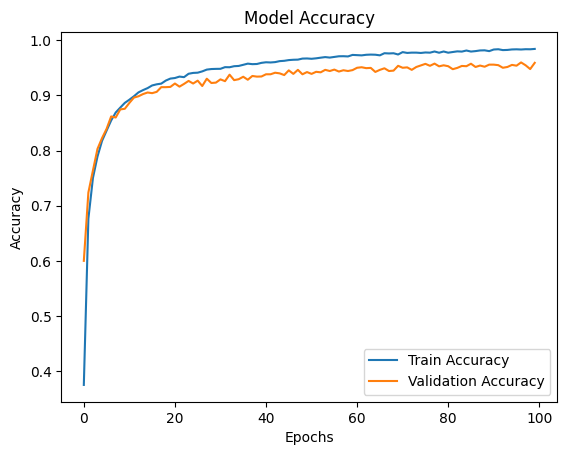

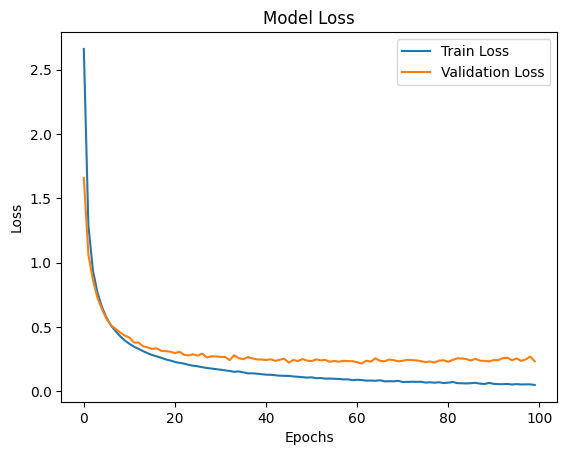

In [150]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(total_class, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
)

# Visualisasi akurasi
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Visualisasi kerugian
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Implement Cross Validation


In [135]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

train_accs = []
val_accs = []

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(total_class, activation="softmax"))

model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=10,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0,
    )

    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]

    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Fold {i}: Training Accuracy = {train_acc}, Validation Accuracy = {val_acc}")

avg_train_acc = np.mean(train_accs)
avg_val_acc = np.mean(val_accs)

print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)

Fold 0: Training Accuracy = 0.8847997784614563, Validation Accuracy = 0.8672566413879395
Fold 1: Training Accuracy = 0.9323696494102478, Validation Accuracy = 0.9185840487480164
Fold 2: Training Accuracy = 0.9509550929069519, Validation Accuracy = 0.930973470211029
Fold 3: Training Accuracy = 0.9625341296195984, Validation Accuracy = 0.9371681213378906
Fold 4: Training Accuracy = 0.9638643264770508, Validation Accuracy = 0.9563292860984802
Average Training Accuracy: 0.938904595375061
Average Validation Accuracy: 0.9220623135566711


## Save Model


In [136]:
model_path = "./models/14-juni-1058am.h5"
model.save(model_path)

c:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load Model


In [137]:
model = load_model(model_path)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                4096      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 66)                2178      
                                                                 
Total params: 8354 (32.63 KB)
Trainable params: 8354 (32.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Test Distribusi Akurasi Per Kelas


In [138]:
test_feat_df = pd.read_csv("./datasets/extraction-feature-default/test-feature.csv")
test_label_df = pd.read_csv("./datasets/extraction-feature-default/test-label.csv")

display(test_feat_df.head(), test_label_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.640412,1.197453,-0.295301,0.548439,1.362944,0.111415,0.379803,1.360428,0.354165,0.223994,1.395894,0.502533,0.075982,1.466288,0.572111,0.502573,1.164449,0.540264,0.336907,1.277686,0.609641,0.170871,1.313310,0.583413,0.033295,...,0.408372,0.554850,0.976948,0.686481,0.369580,1.000698,0.615510,0.227919,0.953045,0.462804,0.098944,0.922822,0.319248,0.560743,0.937127,0.680307,0.401420,0.971763,0.564300,0.299559,0.947341,0.417445,0.211684,0.915118,0.277034
1,-1.218357,-1.201384,-1.348450,-1.260559,-1.522007,-0.506036,-1.037237,-1.583423,-0.144038,-0.716425,-1.480265,0.233828,-0.539287,-1.224634,0.571314,-0.648596,-0.925921,-0.710640,-0.429669,-1.057708,0.034928,-0.648444,-0.982385,0.474089,-0.758694,...,0.686660,-0.465552,-0.657469,0.427643,-0.323101,-0.869678,0.640454,-0.494674,-0.933153,0.794066,-0.650319,-0.830926,0.792739,-0.462306,-0.681101,0.918721,-0.188981,-0.612228,0.657263,0.030432,-0.578776,0.356074,0.211582,-0.491211,0.090567
2,0.291377,1.527686,0.600556,0.143647,1.447999,0.142487,-0.040986,1.292361,0.101728,-0.182063,1.091837,0.135058,-0.294572,0.887059,0.102910,-0.041345,1.601611,-0.700862,-0.099700,1.349972,-0.576354,-0.102047,1.147110,-0.476574,-0.092739,...,-0.579808,0.229465,1.613859,-0.735193,0.194431,1.203407,-0.561593,0.210478,0.873255,-0.719272,0.222881,0.637106,-0.870984,0.369924,1.568550,-0.607946,0.346101,1.316688,-0.644905,0.340217,1.094473,-0.853767,0.340220,0.914858,-1.024069
3,2.022715,2.097618,0.396615,2.120663,1.779016,-0.147207,2.063505,1.644503,-0.055893,1.851886,1.602315,0.133079,1.606098,1.626792,0.229664,1.851823,2.073913,-0.816911,1.525357,2.068656,-0.444301,1.302108,2.049825,-0.189486,1.115682,...,-0.146701,1.696001,2.496223,-0.139856,1.442580,2.528737,0.065700,1.261621,2.427117,-0.017211,1.113556,2.352015,-0.106911,1.645947,2.546639,0.244760,1.461125,2.578407,0.302527,1.334803,2.549477,0.204149,1.220707,2.515218,0.116767
4,2.122313,-1.145586,0.313387,2.086979,-1.045586,-0.696492,1.944856,-0.859055,-0.775585,1.829763,-0.640262,-0.721696,1.785174,-0.443695,-0.694622,2.014835,-0.712439,-1.283457,1.881816,-0.576913,-1.157464,1.801288,-0.440283,-1.073672,1.702576,...,-0.807627,2.143152,-0.574207,-0.889722,2.059269,-0.411024,-0.756903,1.997998,-0.372654,-0.766508,1.940067,-0.352599,-0.776517,2.181023,-0.521417,-0.612317,2.072422,-0.365371,-0.560226,2.011549,-0.332121,-0.560302,1.968740,-0.317842,-0.596716


,true_kategorik
0,Pagi
1,J
2,Bagaimana
3,Bagaimana
4,S


In [142]:
y_pred = model.predict(X_test)
y_pred_label = label_encoder.inverse_transform(y_pred.argmax(axis=1))
print(y_pred_label)

y_true_label = label_encoder.inverse_transform(y_test.argmax(axis=1))
print(y_true_label)

133/133 [==============================] - 0s 1ms/step
['Pagi' 'J' 'Bagaimana' ... 'L' 'Nanti' 'C']
['Pagi' 'J' 'Bagaimana' ... 'L' 'Nanti' 'C']


In [143]:
eval_df = test_label_df
eval_df["true_kategorik"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
eval_df["predicted_kategorik"] = y_pred_label

## Find Predicted Label != True Label


In [144]:
eval_df[eval_df["true_kategorik"] != eval_df["predicted_kategorik"]]

,true_kategorik,predicted_kategorik
4,S,K
26,H,K
34,H,K
43,Apa,Kemana
44,B,K
67,T,S
72,D,P
101,B,E
139,E,B
175,Kalian,M


In [145]:
len(set(eval_df["true_kategorik"].to_list()))

66

## Get Recall Each Class


In [146]:
# Menghitung jumlah True Positives (TP) dan False Negatives (FN) untuk setiap kelas
recall_data = eval_df.groupby("true_kategorik").apply(
    lambda x: pd.Series(
        {
            "TP": sum(x["true_kategorik"] == x["predicted_kategorik"]),
            "FN": sum(x["true_kategorik"] != x["predicted_kategorik"]),
        }
    )
)

# Menghitung recall untuk setiap kelas
recall_data["Recall"] = recall_data["TP"] / (recall_data["TP"] + recall_data["FN"])
recall_data["Recall"] = recall_data["Recall"].fillna(
    0
)  # Mengganti NaN dengan 0 jika ada

recall_data_sorted = recall_data.sort_values(by="Recall")
# Menampilkan hasil
print("Recall for each class:")
print(recall_data_sorted)

Recall for each class:
                 TP  FN    Recall
true_kategorik                   
H                18  19  0.486486
P                17  14  0.548387
D                22  13  0.628571
Sakit            13   6  0.684211
B                33  12  0.733333
T                40  12  0.769231
A                33   8  0.804878
G                52  12  0.812500
X                41   9  0.820000
F                58  12  0.828571
E                56  11  0.835821
N                58  10  0.852941
Lelah            54   9  0.857143
S                37   6  0.860465
Kantor           68  11  0.860759
M                46   7  0.867925
Senang           36   5  0.878049
K                54   7  0.885246
Makan            50   5  0.909091
Kalian           64   6  0.914286
Tolong           77   6  0.927711
I                66   5  0.929577
W                49   3  0.942308
Baik             66   4  0.942857
C                67   4  0.943662
R                69   4  0.945205
Terima kasih     52   3  

## Visualize Eval


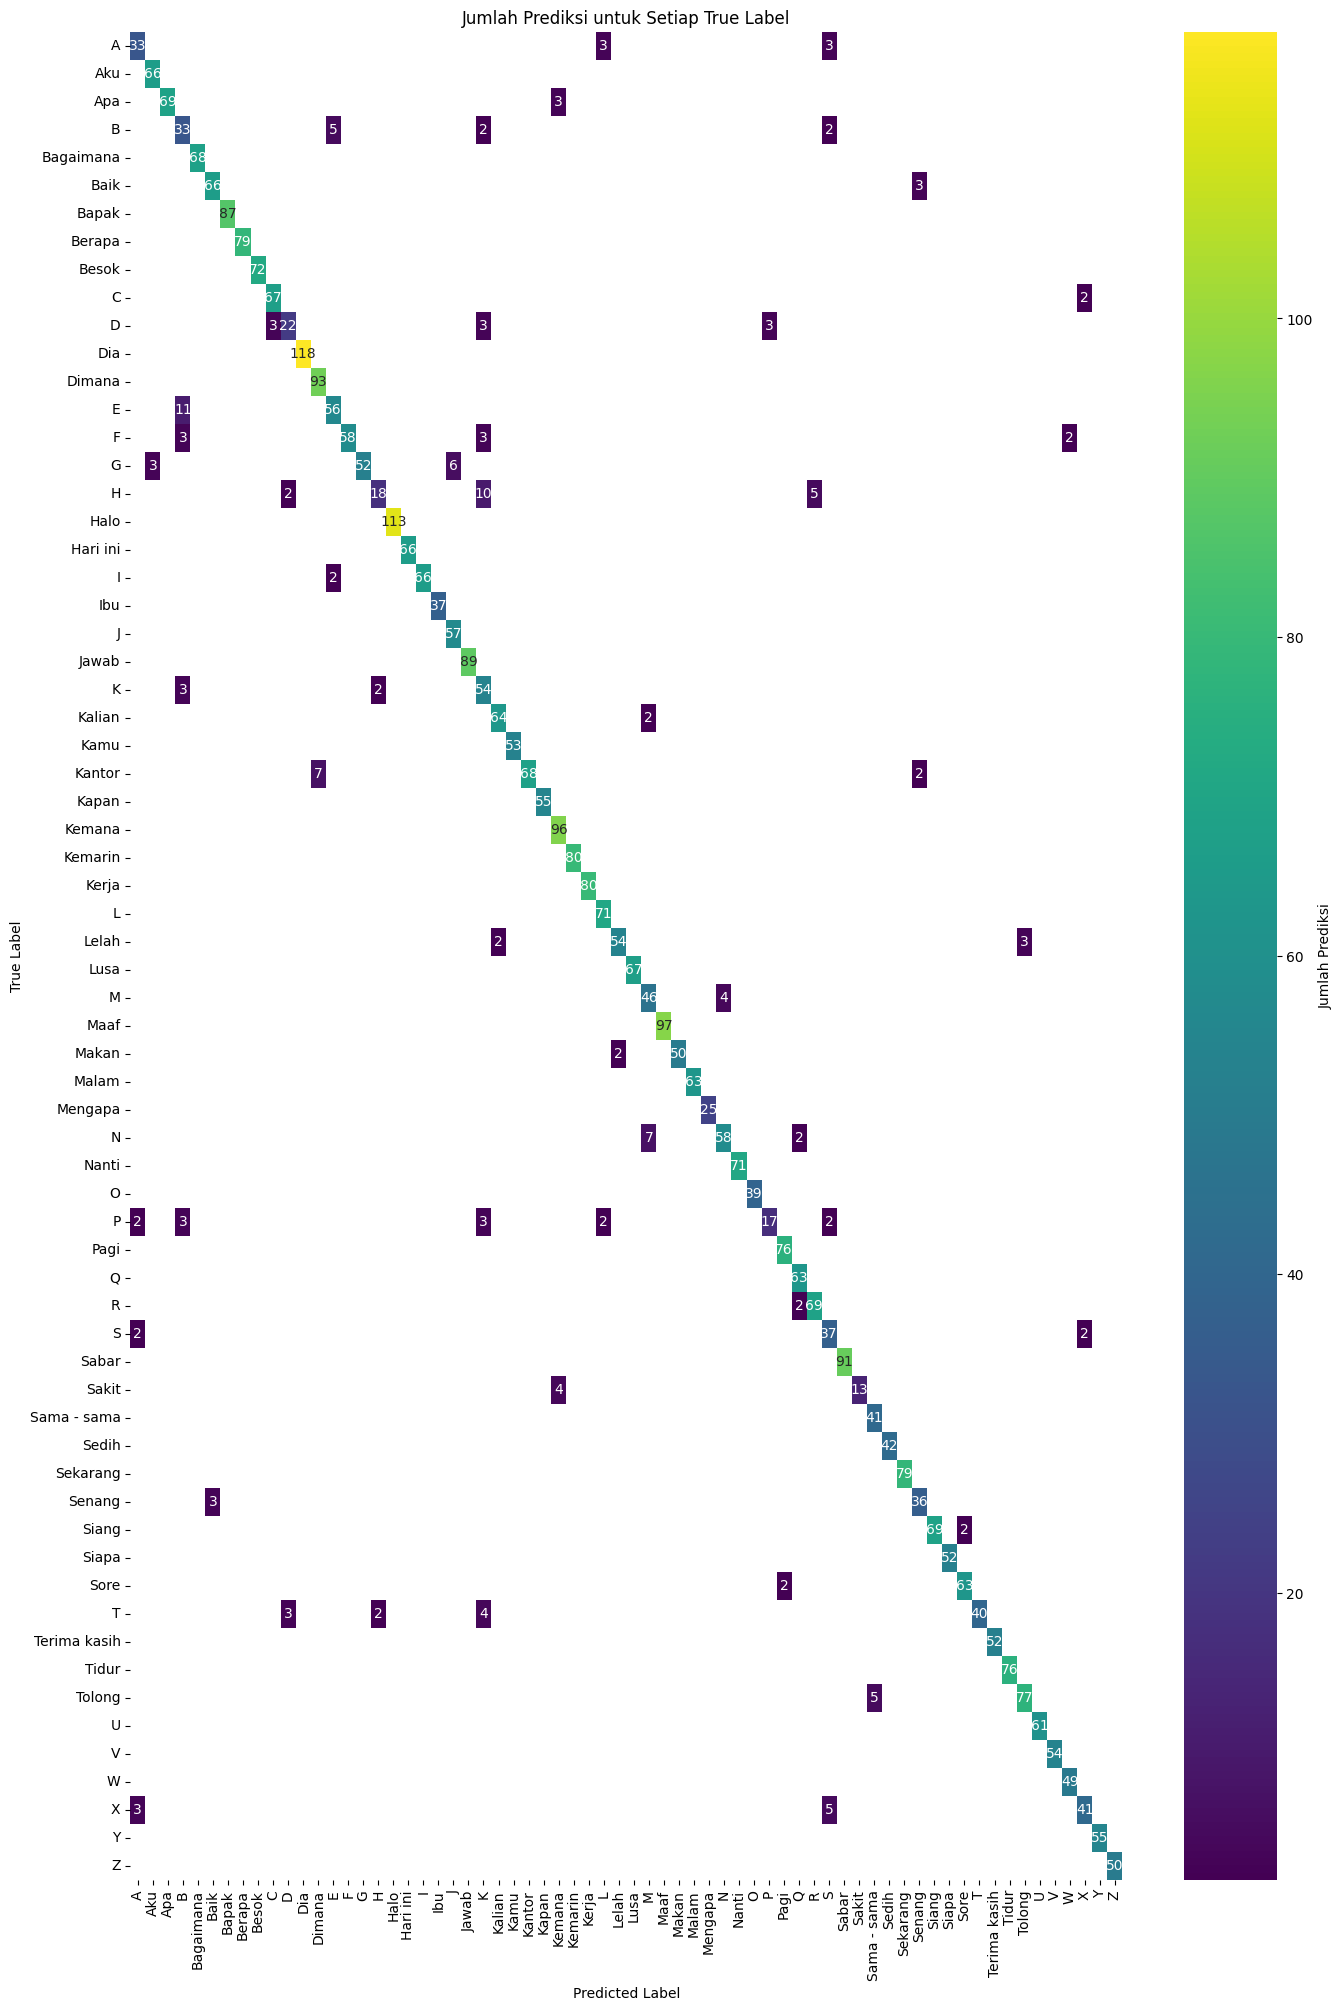

In [147]:
count_predictions = (
    eval_df.groupby(["true_kategorik", "predicted_kategorik"]).size().unstack(fill_value=0)
)
mask = count_predictions <= 1

plt.figure(figsize=(16, 24))
sns.heatmap(
    count_predictions,
    annot=True,
    fmt="d",
    cmap="viridis",
    mask=mask,
    cbar_kws={"label": "Jumlah Prediksi"},
)
plt.title("Jumlah Prediksi untuk Setiap True Label")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

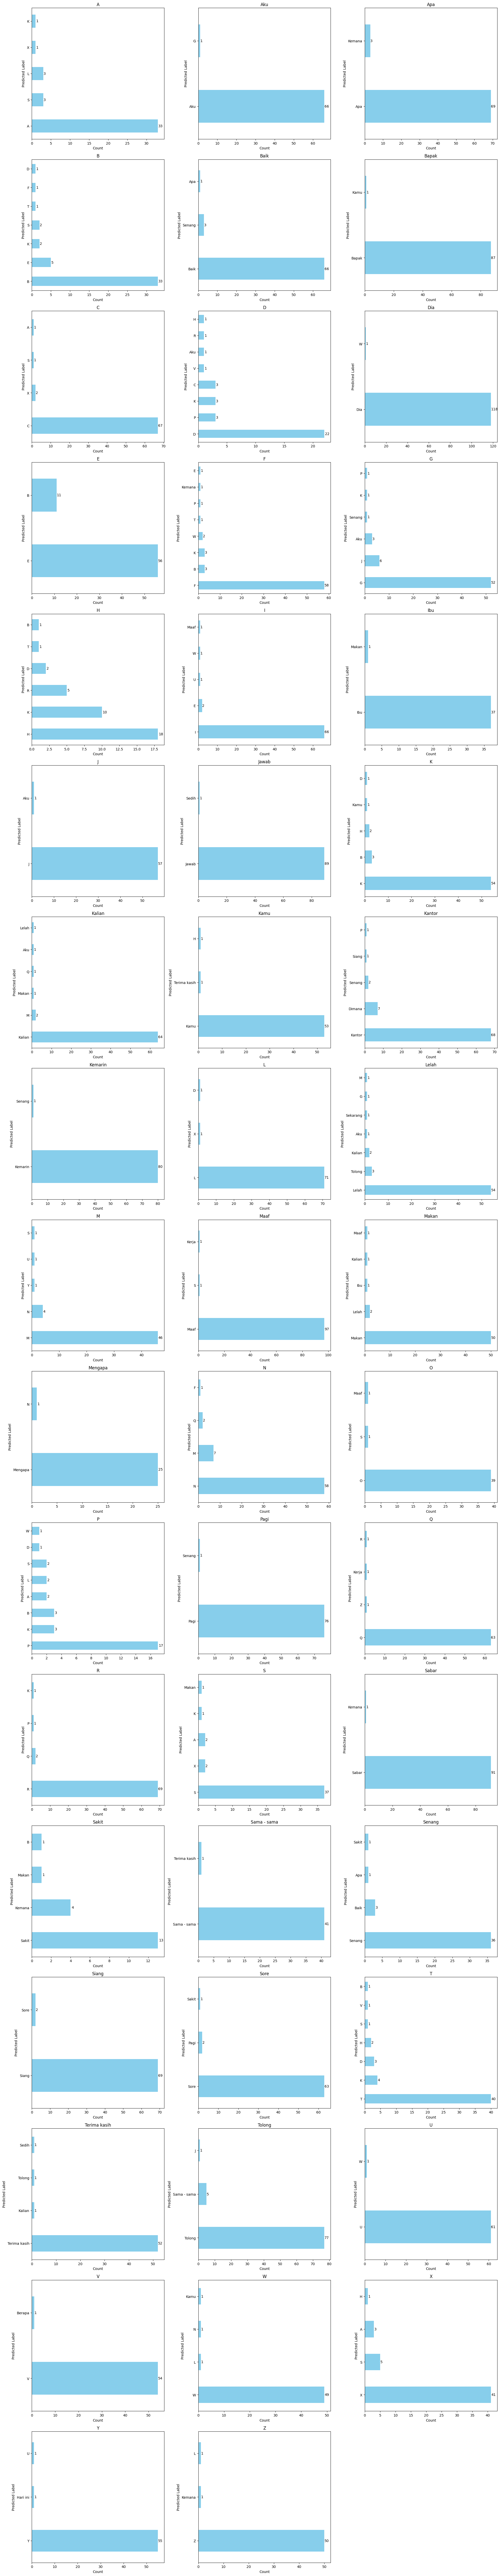

In [149]:
count_predictions = (
    eval_df.groupby(["true_kategorik", "predicted_kategorik"]).size().unstack(fill_value=0)
)

num_classes = count_predictions.shape[0]
num_cols = 3
num_rows = (num_classes + num_cols - 1) // num_cols  # Pembulatan ke atas

# Membuat plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = np.array(axes).flatten()

# Plot untuk setiap true_kategorik
plot_count = 0
for i, true_kategorik in enumerate(count_predictions.index):
    # Filter hanya untuk nilai-nilai yang memiliki frekuensi lebih dari nol dan nilai prediksi tidak sama dengan true label
    data_to_plot = count_predictions.loc[true_kategorik][
        (count_predictions.loc[true_kategorik] > 0)
        & (count_predictions.columns != true_kategorik)
    ]
    if not data_to_plot.empty and not data_to_plot.eq(0).all():
        ax = axes[plot_count]
        # Mengganti label angka dengan label kategorikal yang sesuai dari DataFrame eval_df
        eval_data_to_plot = eval_df[eval_df["true_kategorik"] == true_kategorik][
            "predicted_kategorik"
        ].value_counts()
        eval_data_to_plot.plot(
            kind="barh", ax=ax, color="skyblue"
        )  # Mengubah menjadi plot horizontal ('barh')
        ax.set_xlabel("Count")
        ax.set_ylabel("Predicted Label")  # Mengganti label sumbu x dan y
        ax.set_title(
            f'{eval_df[eval_df["true_kategorik"] == true_kategorik]["true_kategorik"].iloc[0]}'
        )

        # Menambahkan label angka di sebelah kanan diagram
        for j, v in enumerate(eval_data_to_plot.values):
            ax.text(v + 0.1, j, str(v), ha="left", va="center")

        plot_count += 1

# Menghapus axes yang kosong pada layout
for j in range(plot_count, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()